In [19]:
__file__ = 'erosion_and_dilation.ipynb'
import sys
import pathlib
sys.path.append(str(pathlib.Path(__file__).absolute().parent.parent)+"/FP7_lib")

import functions as f
import os
import numpy as np
import matplotlib.pyplot as plt

In [20]:
data = []
for file in os.listdir('Data_old'):
        with open('Data_old/'+file, mode='r') as tf:
            datain = np.genfromtxt(tf,delimiter="\t",skip_header=15).T
            data.append([file.split('.')[0],datain[0],datain[1],np.sqrt(datain[1].clip(min=1))])
            

[array([0.000e+00, 1.000e+00, 2.000e+00, ..., 2.045e+03, 2.046e+03,
       2.047e+03]), array([2., 6., 3., ..., 0., 0., 0.])]
[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 29
    # data points      = 2047
    # variables        = 3
    chi-square         = 1494.69377
    reduced chi-square = 0.73125918
    Akaike info crit   = -637.687252
    Bayesian info crit = -620.814860
[[Variables]]
    amplitude:  12607.1429 +/- 96.3300463 (0.76%) (init = 25042.5)
    center:     668.638062 +/- 1.26636044 (0.19%) (init = 685.6082)
    sigma:      161.208191 +/- 0.97941696 (0.61%) (init = 185.5)
    fwhm:       379.616271 +/- 2.30635066 (0.61%) == '2.3548200*sigma'
    height:     31.1989270 +/- 0.30034599 (0.96%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(center, sigma) = -0.132


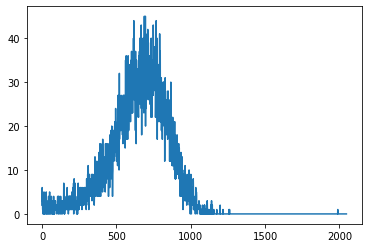

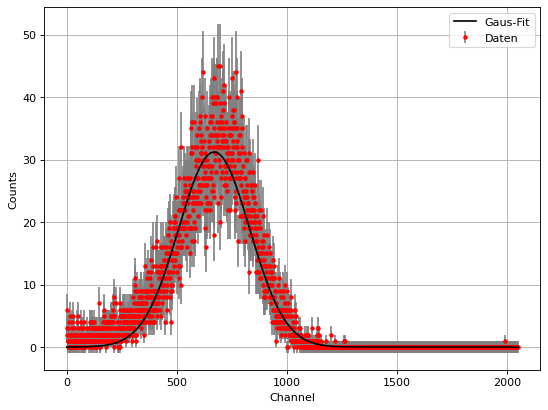

In [21]:
for i in data:
    if i[0] == '500Torr':
        plt.plot(i[1],i[2])
        f.gaus1fit(i,0,2047,'test')

In [22]:
x = 0
y = []
y.append((x if x !=0 else 1))
print(y)

[1]


In [23]:
x=np.array([0,1,0,1])
print(x.clip(min=1))

[1 1 1 1]
